# ObsID : 0945020137, SRCNUM : 21, Instru : EMOS1

In [2]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy.table import Table
from astropy.modeling import models
from astropy.io import fits

from stingray.gti import create_gti_from_condition, gti_border_bins, time_intervals_from_gtis, cross_two_gtis
from stingray.utils import show_progress
from stingray.fourier import avg_cs_from_events, avg_pds_from_events, poisson_level, get_average_ctrate
from stingray import AveragedPowerspectrum, AveragedCrossspectrum, EventList
from stingray.modeling.parameterestimation import PSDLogLikelihood
from stingray import Lightcurve

plt.rcParams['figure.figsize'] = [12,7.5]

In [3]:
def lightcurve(file):
    hdul = fits.open(file)
    print()
    print(color.BOLD +file+ color.END)
    hdul.info()
    
    rate_data = hdul[1].columns
    print()
    print(rate_data)
        
    time = hdul[1].data.field('TIME')
    rate = hdul[1].data.field('RATE')
    error = hdul[1].data.field('ERROR')
    backrate = hdul[1].data.field('BACKV')
    
    """
    print()
    print(f"TIME = {time} s")
    print(f"RATE = {rate} count/s")
    print(f"ERROR = {error} count/s")
    """
    
    lcs = []
    backlcs = []
    gtis = []
    for i in hdul[2].data:
        gtis.append([i[0],i[1]])
    lcs.append(Lightcurve(time, rate, error, gti=gtis, input_counts=False))
    backlcs.append(Lightcurve(time, backrate, error, gti=gtis, input_counts=False))
    
    for i in range(len(lcs)):
        plt.xlabel('Time (s)')
        plt.ylabel('Countrate (/s)')
        plt.plot(lcs[i].time, lcs[i].countrate, color='k', lw=1, ds='steps-mid', label='Source')
        plt.plot(backlcs[i].time, backlcs[i].countrate, color='firebrick',lw=1, ls='--', ds='steps-mid', label='Bkg')
        plt.legend(loc='upper right')
        plt.grid()
        for j in range(len(lcs[i].gti)-1):
            plt.axvspan(lcs[i].gti[j][1],lcs[i].gti[j+1][0],color='purple',alpha=0.25)
        plt.show()

## Time bin size = 10s


ObsID0945020137_SRCNUM21_EMOS1_t10_lccorr.lc
Filename: ObsID0945020137_SRCNUM21_EMOS1_t10_lccorr.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      17   ()      
  1  RATE          1 BinTableHDU     77   1836R x 6C   [D, E, E, E, E, E]   
  2  SRC_GTIS      1 BinTableHDU     28   1R x 2C   [D, D]   
  3  BKG_GTIS      1 BinTableHDU     28   1R x 2C   [D, D]   
  4  REG00105      1 BinTableHDU     24   1R x 5C   [16A, E, E, E, B]   

ColDefs(
    name = 'TIME'; format = 'D'; unit = 's'
    name = 'RATE'; format = 'E'; unit = 'count/s'
    name = 'ERROR'; format = 'E'; unit = 'count/s'
    name = 'FRACEXP'; format = 'E'; unit = 'fraction'
    name = 'BACKV'; format = 'E'; unit = 'count/s'
    name = 'BACKE'; format = 'E'; unit = 'count/s'
)


C:\Users\acer\anaconda3\Lib\site-packages\stingray\lightcurve.py:520: UserWarning: There are non-finite points in the data, but they are outside GTIs. 
  warnings.warn("There are non-finite points in the data, but they are outside GTIs. ")
C:\Users\acer\anaconda3\Lib\site-packages\stingray\lightcurve.py:329: UserWarning: On Windows, the size of an integer is 32 bits. To avoid integer overflow, I'm converting the input array to float
  warnings.warn(
C:\Users\acer\anaconda3\Lib\site-packages\stingray\lightcurve.py:333: RuntimeWarning: invalid value encountered in cast
  counts = counts.astype(float)
C:\Users\acer\anaconda3\Lib\site-packages\stingray\lightcurve.py:520: UserWarning: There are non-finite points in the data, but they are outside GTIs. 
  warnings.warn("There are non-finite points in the data, but they are outside GTIs. ")


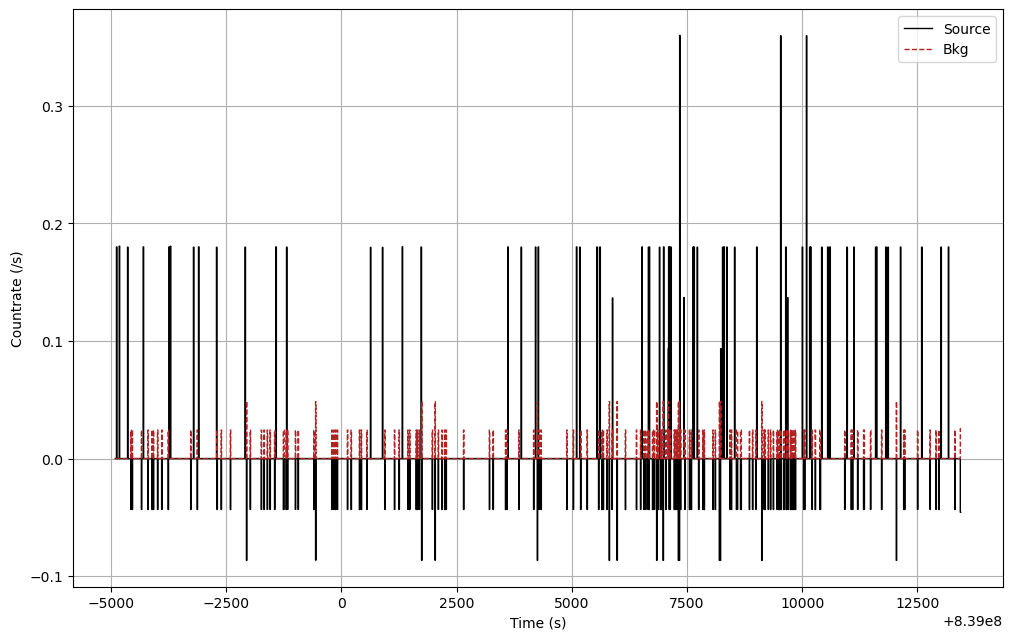

In [5]:
lightcurve("ObsID0945020137_SRCNUM21_EMOS1_t10_lccorr.lc")

## Time bin size = 50s


ObsID0945020137_SRCNUM21_EMOS1_t50_lccorr.lc
Filename: ObsID0945020137_SRCNUM21_EMOS1_t50_lccorr.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      17   ()      
  1  RATE          1 BinTableHDU     77   368R x 6C   [D, E, E, E, E, E]   
  2  SRC_GTIS      1 BinTableHDU     28   1R x 2C   [D, D]   
  3  BKG_GTIS      1 BinTableHDU     28   1R x 2C   [D, D]   
  4  REG00105      1 BinTableHDU     24   1R x 5C   [16A, E, E, E, B]   

ColDefs(
    name = 'TIME'; format = 'D'; unit = 's'
    name = 'RATE'; format = 'E'; unit = 'count/s'
    name = 'ERROR'; format = 'E'; unit = 'count/s'
    name = 'FRACEXP'; format = 'E'; unit = 'fraction'
    name = 'BACKV'; format = 'E'; unit = 'count/s'
    name = 'BACKE'; format = 'E'; unit = 'count/s'
)


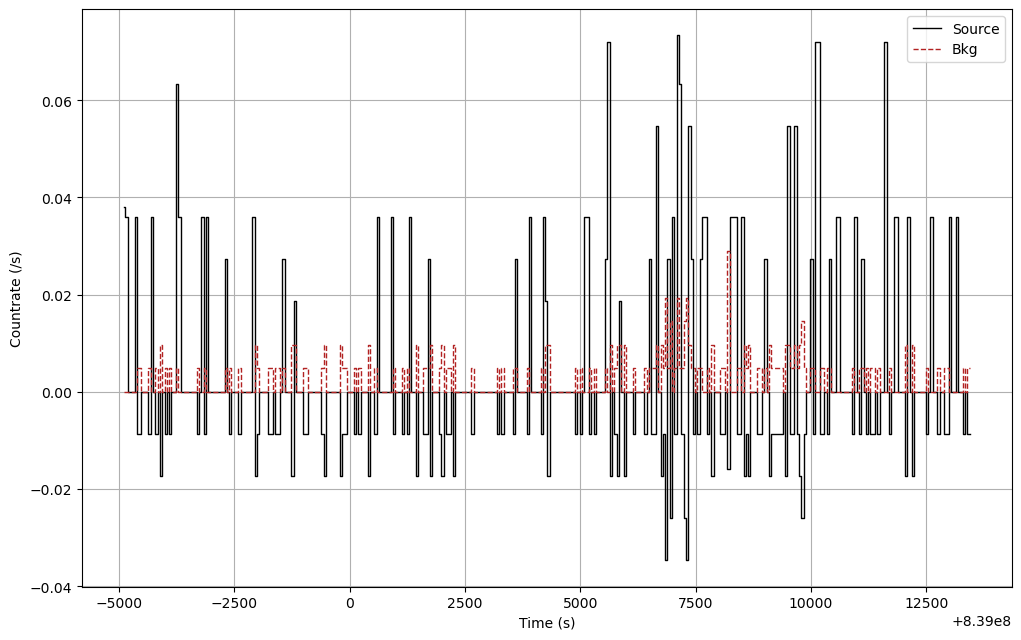

In [7]:
lightcurve("ObsID0945020137_SRCNUM21_EMOS1_t50_lccorr.lc")

## Time bin size = 200s


ObsID0945020137_SRCNUM21_EMOS1_t200_lccorr.lc
Filename: ObsID0945020137_SRCNUM21_EMOS1_t200_lccorr.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      17   ()      
  1  RATE          1 BinTableHDU     77   92R x 6C   [D, E, E, E, E, E]   
  2  SRC_GTIS      1 BinTableHDU     28   1R x 2C   [D, D]   
  3  BKG_GTIS      1 BinTableHDU     28   1R x 2C   [D, D]   
  4  REG00105      1 BinTableHDU     24   1R x 5C   [16A, E, E, E, B]   

ColDefs(
    name = 'TIME'; format = 'D'; unit = 's'
    name = 'RATE'; format = 'E'; unit = 'count/s'
    name = 'ERROR'; format = 'E'; unit = 'count/s'
    name = 'FRACEXP'; format = 'E'; unit = 'fraction'
    name = 'BACKV'; format = 'E'; unit = 'count/s'
    name = 'BACKE'; format = 'E'; unit = 'count/s'
)


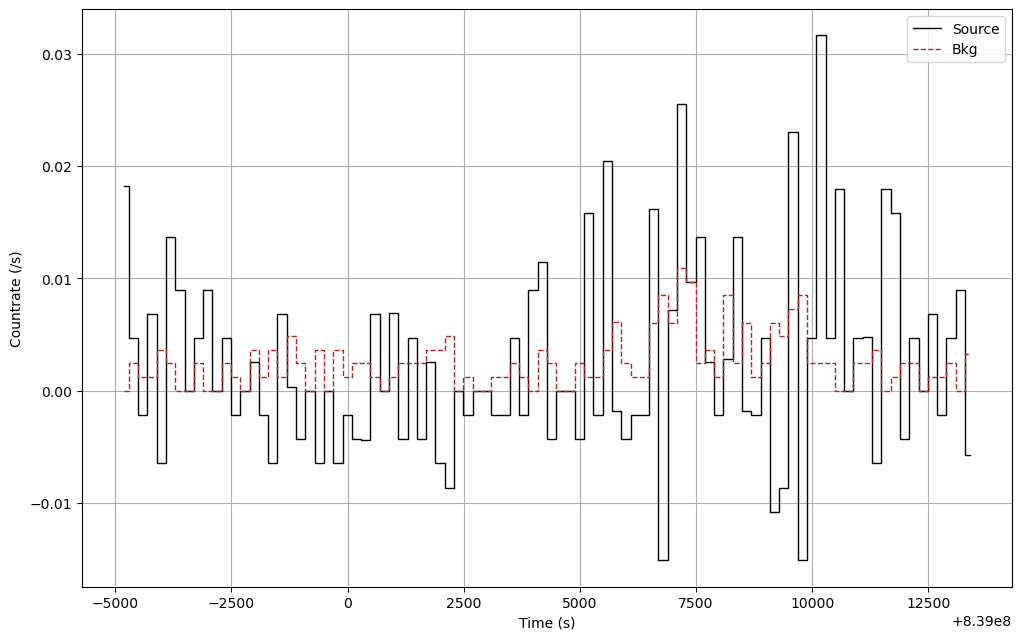

In [9]:
lightcurve("ObsID0945020137_SRCNUM21_EMOS1_t200_lccorr.lc")

## Time bin size = 500s


ObsID0945020137_SRCNUM21_EMOS1_t500_lccorr.lc
Filename: ObsID0945020137_SRCNUM21_EMOS1_t500_lccorr.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      17   ()      
  1  RATE          1 BinTableHDU     77   37R x 6C   [D, E, E, E, E, E]   
  2  SRC_GTIS      1 BinTableHDU     28   1R x 2C   [D, D]   
  3  BKG_GTIS      1 BinTableHDU     28   1R x 2C   [D, D]   
  4  REG00105      1 BinTableHDU     24   1R x 5C   [16A, E, E, E, B]   

ColDefs(
    name = 'TIME'; format = 'D'; unit = 's'
    name = 'RATE'; format = 'E'; unit = 'count/s'
    name = 'ERROR'; format = 'E'; unit = 'count/s'
    name = 'FRACEXP'; format = 'E'; unit = 'fraction'
    name = 'BACKV'; format = 'E'; unit = 'count/s'
    name = 'BACKE'; format = 'E'; unit = 'count/s'
)


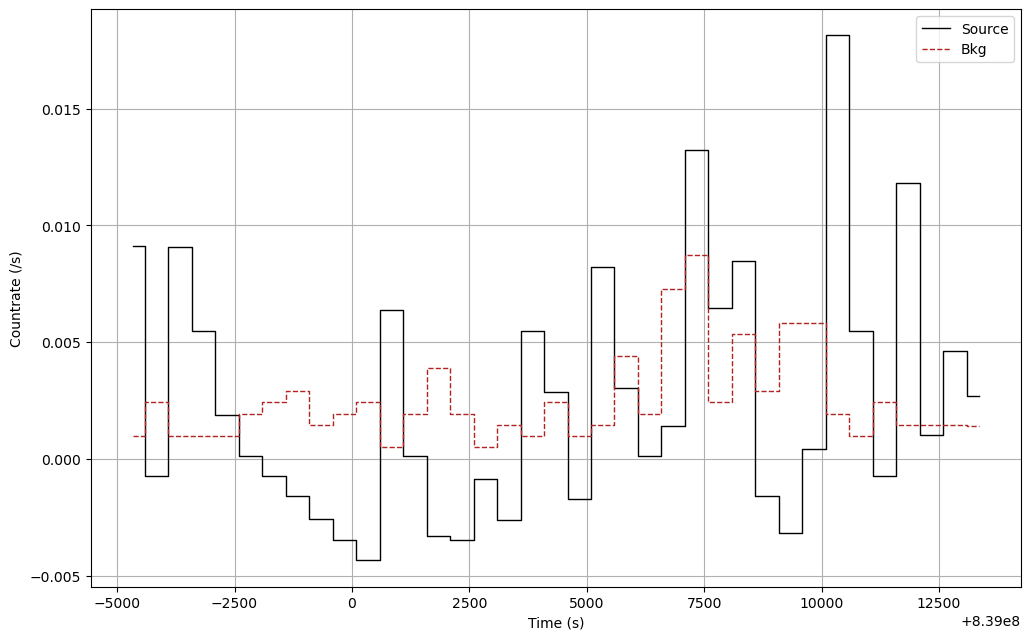

In [11]:
lightcurve("ObsID0945020137_SRCNUM21_EMOS1_t500_lccorr.lc")